In [2]:
import matplotlib.pyplot as plt 
import numpy as np 

import torch
from torch import nn, optim
from torch.autograd import variable
import torch.nn.functional as F 

import torchvision
from torchvision import datasets, transforms, models

from PIL import Image

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
data_dir = './Data'

def load_split_train_test(data_dir, valid_size = 0.2):

    train_transforms = transforms.Compose([
                                           transforms.RandomResizedCrop(224),
                                           transforms.Resize(224),
                                           transforms.ToTensor(),
                                          ])
    test_transforms = transforms.Compose([
                                           transforms.RandomResizedCrop(224),
                                           transforms.Resize(224),
                                           transforms.ToTensor(),
                                          ])

    train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=test_transforms)

    num_train = len(train_data)

    indices = list(range(num_train))

    split = int(np.floor(valid_size * num_train))

    np.random.shuffle(indices)

    from torch.utils.data.sampler import SubsetRandomSampler

    train_idx, test_idx = indices[split:], indices[:split]
    
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    trainloader = torch.utils.data.DataLoader(train_data, sampler= train_sampler, batch_size = 16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size = 16)

    return trainloader, testloader

trainloader, testloader = load_split_train_test(data_dir, 0.2)

print(trainloader.dataset.classes)



['Basalt', 'Highland']


In [7]:
test_transforms = transforms.Compose([
                                    transforms.RandomResizedCrop(224),
                                    transforms.Resize(224),
                                    transforms.ToTensor(),
                                    ])

def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]

    from torch.utils.data.sampler import SubsetRandomSampler

    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler = sampler , batch_size = num)

    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

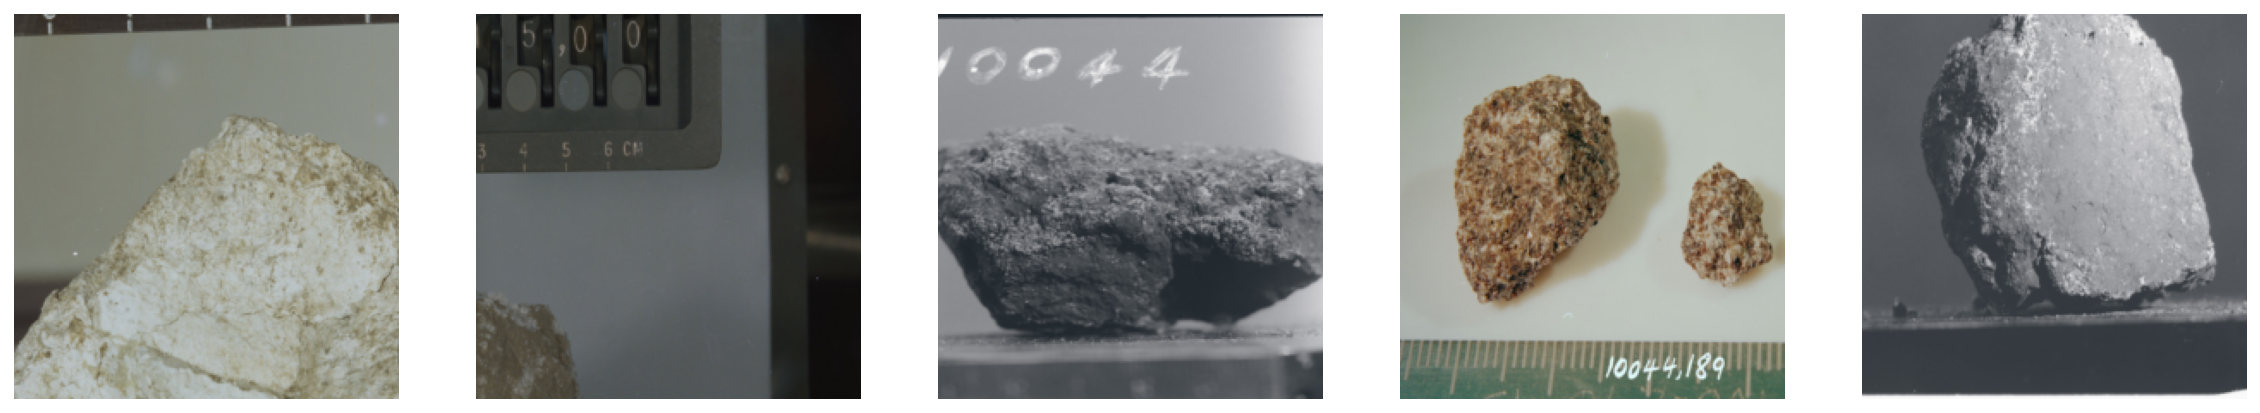

In [9]:
images, labels = get_random_images(5)

to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20,20))

classes = trainloader.dataset.classes

for ii in range(len(images)):
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii +1)
    plt.axis('off')
    plt.imshow(image)

plt.show()